In [430]:
import numpy as np
from sklearn.datasets import load_boston

data, target = load_boston(return_X_y = True)

data = np.column_stack((data, np.ones((506,1))))
target = np.array([target]).T

In [431]:
class ls_regression:
    def __init__(self):
        self.data = None
        self.target = None
        self.weights = np.zeros((1,data.shape[0])).T
        
    def learn_ls(self, X, Y):
        self.weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)
        
    def print_weights(self):
        print(self.weights)
        
    def predict(self, X):
        res = np.matmul(X, self.weights)
        return np.matmul(X, self.weights)
    
    def cross_validation(self, X, Y):
        self.data = X
        self.target = Y
        
        fold1 = self.data[:101]
        fold2 = self.data[101:202]
        fold3 = self.data[202:303]
        fold4 = self.data[303:404]
        fold5 = self.data[404:]
        
        label1 = self.target[:101]
        label2 = self.target[101:202]
        label3 = self.target[202:303]
        label4 = self.target[303:404]
        label5 = self.target[404:]      
        
        #iteration 1
        training_data = np.vstack((fold2, fold3, fold4, fold5))
        test_data = np.array(fold1)
        
        training_label = np.vstack((label2, label3, label4, label5))
        test_label = np.array(label1)
                
        self.learn_ls(training_data, training_label)
        pred = self.predict(test_data)

        error1 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
        print("Error: ", error1)
        weight1 = np.array(self.weights)
        
        
        #iteration 2
        training_data = np.vstack((fold1, fold3, fold4, fold5))
        test_data = np.array(fold2)
        
        training_label = np.vstack((label1, label3, label4, label5))
        test_label = np.array(label2)        
        
        self.learn_ls(training_data, training_label)
        pred = self.predict(test_data)

        error2 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
        print("Error: ", error2)
        weight2 = np.array(self.weights)
        
        
        #iteration 3
        training_data = np.vstack((fold1, fold2, fold4, fold5))
        test_data = np.array(fold3)
        
        training_label = np.vstack((label1, label2, label4, label5))
        test_label = np.array(label3)
        
        self.learn_ls(training_data, training_label)
        pred = self.predict(test_data)

        error3 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
        print("Error: ", error3)
        weight3 = np.array(self.weights)

        
        #iteration 4
        training_data = np.vstack((fold1, fold2, fold3, fold5))
        test_data = np.array(fold4)
        
        training_label = np.vstack((label1, label2, label3, label5))
        test_label = np.array(label4)     
        
        self.learn_ls(training_data, training_label)
        pred = self.predict(test_data)

        error4 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
        print("Error: ", error4)
        weight4 = np.array(self.weights)

        
        #iteration 5
        training_data = np.vstack((fold1, fold2, fold3, fold4))
        test_data = np.array(fold5)
        
        training_label = np.vstack((label1, label2, label3, label4))
        test_label = np.array(label5)   
        
        self.learn_ls(training_data, training_label)
        pred = self.predict(test_data)

        error5 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
        print("Error: ", error5)
        weight5 = np.array(self.weights)
        
        print("Average error: ", (error1 + error2 + error3 + error4 + error5) / 5)
        
        return weight1, weight2, weight3, weight4, weight5


In [432]:
boston = ls_regression()
boston.learn_ls(data, target)
pred = boston.predict(data)


weight1, weight2, weight3, weight4, weight5 = boston.cross_validation(data, target)

Error:  12.57469145017896
Error:  25.809700800795664
Error:  33.83904332296235
Error:  80.15018694505544
Error:  32.799862680177974
Average error:  37.03469703983408


In [433]:
res = np.matmul(data, weight1)
print("Best Weights Error: ", np.square(np.linalg.norm(target - res)) / len(target))

Best Weights Error:  22.1441253271984


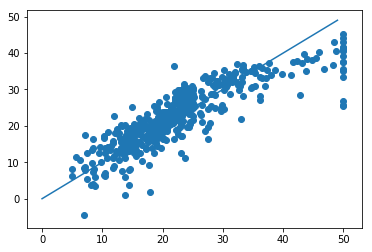

In [434]:
import matplotlib.pyplot as plt
t = range(0,50)
plt.plot(t)
plt.scatter(target, res)

plt.show()

Ridge Regression

In [435]:
def learn_ridge_regression(X, Y, l):
    square = np.matmul(X.T, X)
    return np.matmul(np.matmul(np.linalg.inv(square + l*np.eye(14)), X.T), Y)

def predict_ridge(W, X):
    return np.matmul(X, W)

def ridge_cross_validation(X, Y, l):
    
    data = X
    target = Y

    fold1 = data[:101]
    fold2 = data[101:202]
    fold3 = data[202:303]
    fold4 = data[303:404]

    label1 = target[:101]
    label2 = target[101:202]
    label3 = target[202:303]
    label4 = target[303:404]


    #iteration 1
    training_data = np.vstack((fold2, fold3, fold4))
    test_data = np.array(fold1)

    training_label = np.vstack((label2, label3, label4))
    test_label = np.array(label1)

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error1 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
#     print("Error: ", error1)
    weight1 = np.array(w)


    #iteration 2
    training_data = np.vstack((fold1, fold3, fold4))
    test_data = np.array(fold2)

    training_label = np.vstack((label1, label3, label4))
    test_label = np.array(label2)        

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error2 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
#     print("Error: ", error2)
    weight2 = np.array(w)


    #iteration 3
    training_data = np.vstack((fold1, fold2, fold4))
    test_data = np.array(fold3)

    training_label = np.vstack((label1, label2, label4))
    test_label = np.array(label3)

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error3 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
#     print("Error: ", error3)
    weight3 = np.array(w)


    #iteration 4
    training_data = np.vstack((fold1, fold2, fold3))
    test_data = np.array(fold4)

    training_label = np.vstack((label1, label2, label3))
    test_label = np.array(label4)     

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error4 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
#     print("Error: ", error4)
    weight4 = np.array(w)
    
    return (error1 + error2 + error3 + error4)/4


In [436]:
L = np.linspace(-20, 20, 10000)
fold5 = data[404:]
label5 = target[404:]
errorList = []
for l in L:
    errorList.append(ridge_cross_validation(data, target, l))

In [437]:
minIndex = np.argmin(errorList)
print("Best Lambda: ", L[minIndex])

Best Lambda:  -5.89058905890589


Expected Performance and Average performance

In [438]:
def ridge_cross_validation(X, Y, l):
    
    data = X
    target = Y

    fold1 = data[:101]
    fold2 = data[101:202]
    fold3 = data[202:303]
    fold4 = data[303:404]

    label1 = target[:101]
    label2 = target[101:202]
    label3 = target[202:303]
    label4 = target[303:404]


    #iteration 1
    training_data = np.vstack((fold2, fold3, fold4))
    test_data = np.array(fold1)

    training_label = np.vstack((label2, label3, label4))
    test_label = np.array(label1)

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error1 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
    print("Error: ", error1)
    weight1 = np.array(w)


    #iteration 2
    training_data = np.vstack((fold1, fold3, fold4))
    test_data = np.array(fold2)

    training_label = np.vstack((label1, label3, label4))
    test_label = np.array(label2)        

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error2 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
    print("Error: ", error2)
    weight2 = np.array(w)


    #iteration 3
    training_data = np.vstack((fold1, fold2, fold4))
    test_data = np.array(fold3)

    training_label = np.vstack((label1, label2, label4))
    test_label = np.array(label3)

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error3 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
    print("Error: ", error3)
    weight3 = np.array(w)


    #iteration 4
    training_data = np.vstack((fold1, fold2, fold3))
    test_data = np.array(fold4)

    training_label = np.vstack((label1, label2, label3))
    test_label = np.array(label4)     

    w = learn_ridge_regression(training_data, training_label, l)
    pred = predict_ridge(w, test_data)

    error4 = np.square(np.linalg.norm(test_label - pred)) / len(test_label)
    print("Error: ", error4)
    weight4 = np.array(w)
    
    return (error1 + error2 + error3 + error4)/4

In [439]:
print("Average Error: ", ridge_cross_validation(data, target, L[minIndex]))

Error:  8.843344472659137
Error:  19.29100960287491
Error:  20.916586459704575
Error:  111.66740752031211
Average Error:  40.179587013887684


In [440]:
#weight1 gives the best results
pred = predict_ridge(weight1, fold5)
print("Expected Error: ", np.square(np.linalg.norm(label5 - pred)) / len(label5))

Expected Error:  14.241417471043281
